<center>

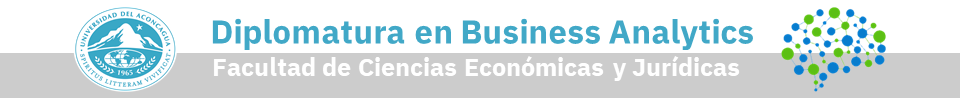

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 10

</font>
</center>

~~~
González, Analía del Valle
~~~

**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar el modelo de regresión > 0.77 $R^2$
- Utilice PyCaret.
- Utilice un método de ensamble.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión.

# **Carga de módulos y datos necesarios**

In [ ]:
!pip install pycaret[silo]

In [2]:
import pandas as pd
import numpy as np

# **Creación del DataFrame**

In [3]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_10_Regresion/propiedades.csv"
df = pd.read_csv(datos)
df

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,2,Argentina,Capital Federal,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,4,Argentina,Capital Federal,Belgrano,6.0,4.0,2.0,190.0,178.0,550000
...,...,...,...,...,...,...,...,...,...,...
44673,44673,Argentina,Capital Federal,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000
44674,44674,Argentina,Capital Federal,Barrio Norte,2.0,1.0,1.0,NaN,NaN,105000
44675,44675,Argentina,Capital Federal,Colegiales,2.0,1.0,1.0,45.0,40.0,99000
44676,44676,Argentina,Capital Federal,Colegiales,1.0,1.0,1.0,59.0,59.0,105000


- l1 - país
- l2 - provincia o ciudad
- l3 - barrio
- rooms - cantidad de habitaciones
- bedrooms - cantidad de dormitorios
- bathrooms - cantidad de baños
- surface_total - superficie total
- surface_covered - superficie cubierta
- price - precio

# **Generación del modelo de regresión**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44678 entries, 0 to 44677
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               44678 non-null  int64  
 1   l1               44678 non-null  object 
 2   l2               44678 non-null  object 
 3   l3               44382 non-null  object 
 4   rooms            43547 non-null  float64
 5   bedrooms         38623 non-null  float64
 6   bathrooms        43371 non-null  float64
 7   surface_total    39856 non-null  float64
 8   surface_covered  40641 non-null  float64
 9   price            44678 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.4+ MB


* Elimino las columnas Id, l1 u l1

In [5]:
df.drop(columns=["id","l1","l2"], inplace=True)

* Veo la cantidad de valores nulos del DF

In [6]:
df.isnull().sum().sort_values(ascending=False)

bedrooms           6055
surface_total      4822
surface_covered    4037
bathrooms          1307
rooms              1131
l3                  296
price                 0
dtype: int64

* Elimino los valores nulos de la variable l3.

In [7]:
df.dropna(subset= ["l3"], how="any", inplace=True)

In [8]:
df.isnull().sum().sort_values(ascending=False)

bedrooms           6003
surface_total      4806
surface_covered    4023
bathrooms          1267
rooms              1122
price                 0
l3                    0
dtype: int64

* Aplico el método de imputación de la mediana a los valores faltantes de las variables bedrooms, surface_total, surface_covered, bathrooms, rooms (numéricas).

In [9]:
df = df.fillna(round(df.median()))

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.isnull().sum().sort_values(ascending=False)

price              0
surface_covered    0
surface_total      0
bathrooms          0
bedrooms           0
rooms              0
l3                 0
dtype: int64

* Codifico la variable l3

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
convertir = LabelEncoder()

In [14]:

df.l3 = convertir.fit_transform(df.l3)

In [15]:
df

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,26,2.0,1.0,1.0,80.0,57.0,235000
1,6,3.0,2.0,1.0,65.0,40.0,105000
2,40,1.0,2.0,1.0,34.0,31.0,109183
3,55,2.0,2.0,1.0,65.0,51.0,110000
4,6,6.0,4.0,2.0,190.0,178.0,550000
...,...,...,...,...,...,...,...
44673,23,2.0,1.0,1.0,56.0,54.0,115000
44674,5,2.0,1.0,1.0,65.0,57.0,105000
44675,14,2.0,1.0,1.0,45.0,40.0,99000
44676,14,1.0,1.0,1.0,59.0,59.0,105000


* División del conjunto de datos, 0.75 para entrenamiento y testeo y el 0.25 datos no vistos, los cuales se van a utilizar como datos nuevos. Del conjunto de 0.75, se dividirán en 0.75 de entrenamiento y 0.25 de testeo.

In [16]:
data = df.sample(frac=0.75, random_state=1985)
data_no_vistos = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_no_vistos.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_no_vistos.shape))

Data for Modeling: (33286, 7)
Unseen Data For Predictions (11096, 7)


In [17]:
from pycaret.regression import *

* Con setup se identifica la procedencia de los datos (data = data, no df pq no trabajo con el total de datos del DF, sólo con el 0.75), 
La variable objetivo (target = price ) y
un número de identificación de la sesión para evitar modelos aleatorios (session_id = 1985). Quedan divididos el conjunto de datos de entrenamiento transformado y
el conjunto de datos de prueba transformado en 0.75 y 0.25 respectivamente, calculados del 0.75 del conjunto de entrenamiento. Se incluye la normalización (para evitar diferencias en el tamaño de los números de cada característica) y se graba el experimento.



In [18]:
regresion = setup(data = data, 
                  target = "price", 
                  session_id=1985,  
                  normalize=True,
                  train_size = 0.75,
                  log_experiment = True,
                  experiment_name = "reg",
                 )

,Description,Value
0,session_id,1985
1,Target,price
2,Original Data,"(33286, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(24964, 6)"


* Se comparan los modelos de regresión

In [19]:
mejor_modelo = compare_models(n_select=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,56500.1278,2.029106e+10,141475.6218,0.8490,0.2766,0.2104,3.884
et,Extra Trees Regressor,55633.6992,2.085395e+10,143264.0214,0.8453,0.2823,0.2091,2.851
lightgbm,Light Gradient Boosting Machine,62503.4161,2.173624e+10,146630.8428,0.8380,0.2910,0.2346,0.221
gbr,Gradient Boosting Regressor,67496.1150,2.320043e+10,151547.0190,0.8269,0.3175,0.2626,1.010
knn,K Neighbors Regressor,68575.5094,2.856821e+10,168332.5546,0.7860,0.3062,0.2408,0.219
dt,Decision Tree Regressor,67222.0863,3.519641e+10,185198.4120,0.7404,0.3345,0.2395,0.070
llar,Lasso Least Angle Regression,92257.3145,4.068424e+10,200382.7766,0.6956,0.4565,0.3649,0.023
ridge,Ridge Regression,92322.6800,4.068650e+10,200385.0428,0.6955,0.4562,0.3656,0.019
br,Bayesian Ridge,92318.9057,4.068657e+10,200385.4374,0.6955,0.4561,0.3655,0.023
lar,Least Angle Regression,92324.1675,4.068661e+10,200385.1699,0.6955,0.4562,0.3656,0.019


* Se muestran los dos mejores modelos. El modelo Random Forest muestra un $R^2$ 0.8490, mayor al obtenido en el colab 8 del módulo de Regresión

In [20]:
mejor_modelo

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1985, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1985, verbose=0, warm_start=False)]

* Se realiza la predicción con el conjunto de datos del DF, agregando la columna Label

In [21]:
predict_model(mejor_modelo[0], data=df)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Label
0,26,2.0,1.0,1.0,80.0,57.0,235000,245555.333333
1,6,3.0,2.0,1.0,65.0,40.0,105000,125951.174964
2,40,1.0,2.0,1.0,34.0,31.0,109183,66218.430484
3,55,2.0,2.0,1.0,65.0,51.0,110000,113826.980000
4,6,6.0,4.0,2.0,190.0,178.0,550000,552830.000000
...,...,...,...,...,...,...,...,...
44673,23,2.0,1.0,1.0,56.0,54.0,115000,114563.472222
44674,5,2.0,1.0,1.0,65.0,57.0,105000,138733.261277
44675,14,2.0,1.0,1.0,45.0,40.0,99000,113118.571429
44676,14,1.0,1.0,1.0,59.0,59.0,105000,128792.113333


In [22]:
evaluate_model(mejor_modelo[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

* Ensamble del modelo

In [23]:
bagged = ensemble_model(mejor_modelo[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,56997.6024,1.901094e+10,137880.1487,0.8455,0.2628,0.2053
1,62125.3916,2.438470e+10,156156.0129,0.8346,0.2790,0.2186
2,57255.6562,1.982047e+10,140785.1922,0.8630,0.2843,0.2632
3,61021.3829,2.548048e+10,159626.0605,0.8234,0.2619,0.2030
4,58329.7001,1.728864e+10,131486.2589,0.8462,0.2628,0.2102
5,58978.6377,1.932307e+10,139007.4497,0.8716,0.2685,0.2115
6,55662.8550,2.306126e+10,151859.3330,0.8097,0.2574,0.2069
7,52331.2619,1.326193e+10,115160.4446,0.8867,0.3643,0.2083
8,64066.3910,2.835919e+10,168401.8775,0.8274,0.2761,0.2186
9,54815.5116,1.605084e+10,126691.8919,0.8571,0.2590,0.2072


# **Conclusiones**

Fuí detallando en celdas de texto los pasos que realicé para mejorar la métrica $R^2$. 


* Con el trabajo realizado obtuve un $R^2$ 0.8490, correspondiente al modelo Random Forest, el cual es mayor al obtenido en el colab 8, pero al aplicar la técnica Bagging el $R^2$ baja a 0.8465, esto podría explicarse por la existencia de una variable de entrada muy influyente, entonces los múltiples árboles genarados por bagging podrían estar dominados por la misma variable, teniendo en cuenta que ésta técnica genera los árboles con el método de reposición, por lo tanto provocaría que los árboles sean parecidos y experimenten una alta correlación entre ellos.